In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\Aether Analytics\\Desktop\\KNN_Project_Data",delimiter=",")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

**Standardize Variables**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
#.trsnform() to scale features
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


**Train Test Split**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [8]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
#Fit the model to Training Data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Predictions and Evaluation**

In [9]:
pred = knn.predict(X_test)

#create confustion matric
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[118  35]
 [ 43 104]]


In [10]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.73      0.77      0.75       153
          1       0.75      0.71      0.73       147

avg / total       0.74      0.74      0.74       300



**Choosing a K Value**

In [13]:
error_rate = []

# Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**retrain with new K Value**

In [15]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[135  18]
 [ 29 118]]


             precision    recall  f1-score   support

          0       0.82      0.88      0.85       153
          1       0.87      0.80      0.83       147

avg / total       0.84      0.84      0.84       300



**K Means Clustering**

**The Data**
*We will use a data frame with 777 observations on the following 18 variables.*

- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("C:\\Users\\Aether Analytics\\Desktop\\College_Data",delimiter=",")

In [17]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [19]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


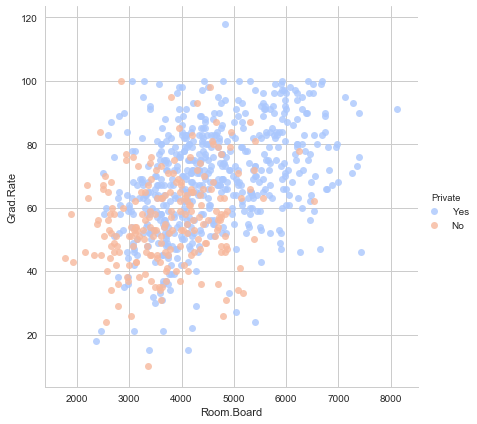

In [20]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

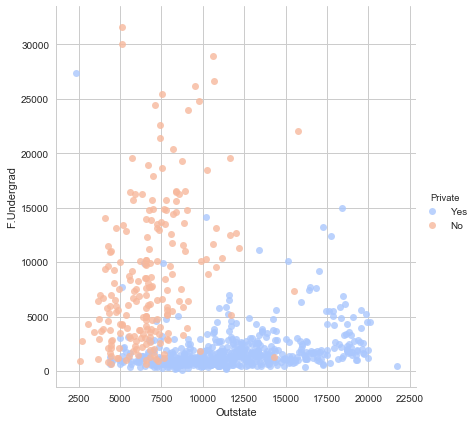

In [21]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

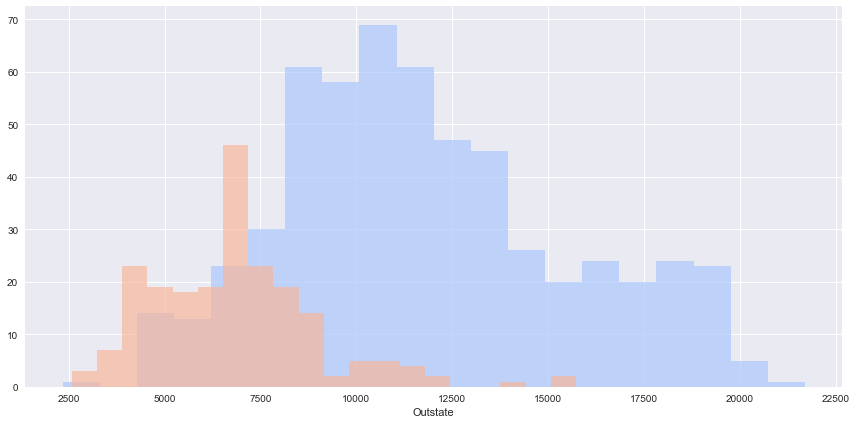

In [22]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

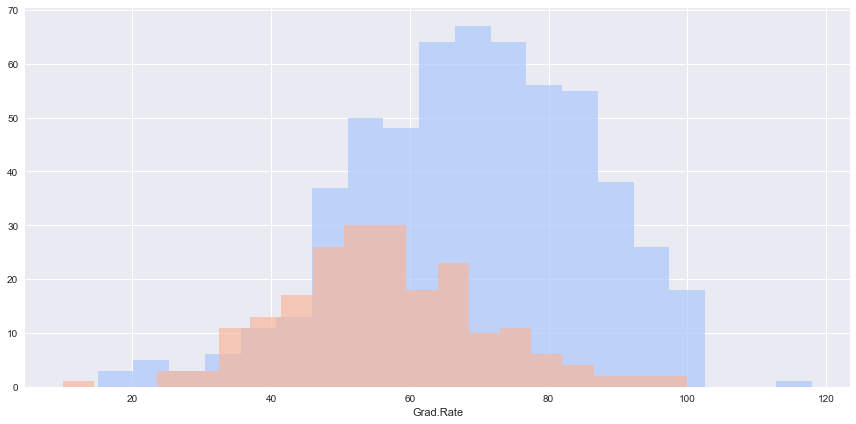

In [23]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [24]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [25]:
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Aether Analytics\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


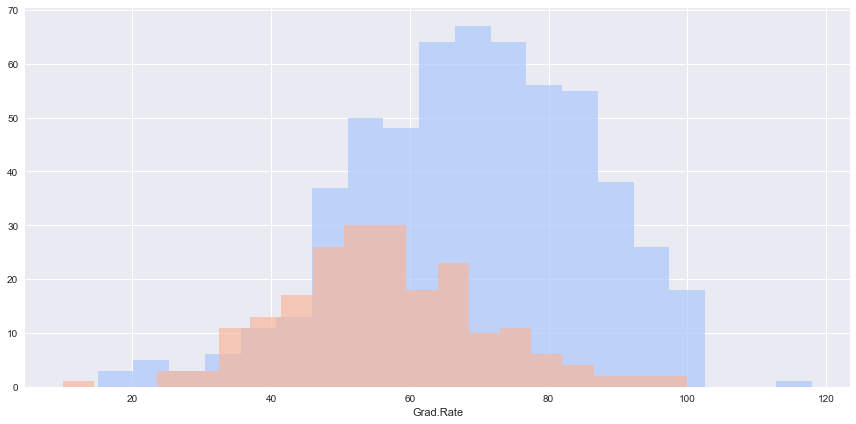

In [26]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**K Means Cluster Creation**

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [32]:
kmeans.fit(df.drop('Private',axis=1))

ValueError: could not convert string to float: York College of Pennsylvania

** Build Stock Market Database in Python**

In [2]:
from lxml import html
import requests
from time import sleep
import json
import argparse
from random import randint
 
def parse_finance_page(ticker):
  """
  Grab financial data from NASDAQ page
  
  Args:
    ticker (str): Stock symbol
  
  Returns:
    dict: Scraped data
  """
  key_stock_dict = {}
  headers = {
        "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
        "Accept-Encoding":"gzip, deflate",
        "Accept-Language":"en-GB,en;q=0.9,en-US;q=0.8,ml;q=0.7",
        "Connection":"keep-alive",
        "Host":"www.nasdaq.com",
        "Referer":"http://www.nasdaq.com",
        "Upgrade-Insecure-Requests":"1",
        "User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.119 Safari/537.36"
  }
 
  # Retrying for failed request
  for retries in range(5):
    try:    
      url = "http://www.nasdaq.com/symbol/%s"%(ticker)
      response = requests.get(url, headers = headers, verify=False)
      
      if response.status_code!=200:
        raise ValueError("Invalid Response Received From Webserver")
 
      print("Parsing %s"%(url))
      # Adding random delay
      sleep(randint(1,3))   
      parser = html.fromstring(response.text)
      xpath_head = "//div[@id='qwidget_pageheader']//h1//text()"
      xpath_key_stock_table = '//div[@class="row overview-results relativeP"]//div[contains(@class,"table-table")]/div'
      xpath_open_price = '//b[contains(text(),"Open Price:")]/following-sibling::span/text()'
      xpath_open_date = '//b[contains(text(),"Open Date:")]/following-sibling::span/text()'
      xpath_close_price = '//b[contains(text(),"Close Price:")]/following-sibling::span/text()'
      xpath_close_date = '//b[contains(text(),"Close Date:")]/following-sibling::span/text()'
      xpath_key = './/div[@class="table-cell"]/b/text()'
      xpath_value = './/div[@class="table-cell"]/text()'
 
      raw_name = parser.xpath(xpath_head)
      key_stock_table =  parser.xpath(xpath_key_stock_table)
      raw_open_price = parser.xpath(xpath_open_price)
      raw_open_date = parser.xpath(xpath_open_date)
      raw_close_price = parser.xpath(xpath_close_price)
      raw_close_date = parser.xpath(xpath_close_date)
 
      company_name = raw_name[0].replace("Common Stock Quote & Summary Data","").strip() if raw_name else ''
      open_price =raw_open_price[0].strip() if raw_open_price else None
      open_date = raw_open_date[0].strip() if raw_open_date else None
      close_price = raw_close_price[0].strip() if raw_close_price else None
      close_date = raw_close_date[0].strip() if raw_close_date else None
 
      # Grabbing ans cleaning keystock data
      for i in key_stock_table:
        key = i.xpath(xpath_key)
        value = i.xpath(xpath_value)
        key = ''.join(key).strip() 
        value = ' '.join(''.join(value).split()) 
        key_stock_dict[key] = value
 
      nasdaq_data = {
 
              "company_name":company_name,
              "ticker":ticker,
              "url":url,
              "open price":open_price,
              "open_date":open_date,
              "close_price":close_price,
              "close_date":close_date,
              "key_stock_data":key_stock_dict
      }
      return nasdaq_data
 
    except Exception as e:
      print("Failed to process the request, Exception:%s"%(e))
 
if __name__=="__main__":
 
  argparser = argparse.ArgumentParser()
  argparser.add_argument('ticker',help = 'Company stock symbol')
  args = argparser.parse_args()
  ticker = args.ticker
  print("Fetching data for %s"%(ticker))
  scraped_data = parse_finance_page(ticker)
  print("Writing scraped data to output file")
 
  with open('%s-summary.json'%(ticker),'w') as fp:
    json.dump(scraped_data,fp,indent = 4,ensure_ascii=False)

usage: __main__.py [-h] ticker
__main__.py: error: unrecognized arguments: -f


SystemExit: 2

C:\Users\ObsidianQuantitative\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


*** Downloading Stock Symbols in RStudo Code ***

In [3]:
install.packages("quantmod") #Install the quantmod library
library("quantmod")  #Load the quantmod Library
stockData <- new.env() #Make a new environment for quantmod to store data in
 
startDate = as.Date("2008-01-13") #Specify period of time we are interested in
endDate = as.Date("2012-01-12")
 
tickers <- c("ARM","CSR") #Define the tickers we are interested in
 
#Download the stock history (for all tickers)
getSymbols(tickers, env = stockData, src = "yahoo", from = startDate, to = endDate)
 
#Use head to show first six rows of matrix
head(stockData$ARM)
 
#Lets look at the just the closing prices
Cl(stockData$ARM)
 
#Lets plot the data
chartSeries(stockData$ARM)
 
#Lets add some bollinger bands to the plot (with period 50 & width 2 standard deviations)
?addBBands #Make R display the help documentation so we know what variables to pass to the function
addBBands(n=50, sd=2)
 
#Lets get the technical indicator values saved into a variable
#Note must give it a single time series (I gave it the close price in this example)
indicatorValuesBBands <- BBands(Cl(stockData$ARM),n=50, sd=2)
 
#Lets examine only a 1 month period of data
armSubset<-  window(stockData$ARM, start = as.Date("2010-02-15"), end = as.Date("2010-03-15"))
armSubset #Lets see the data
 
#Lets extract a 1 month period of data for CSR but starting midway through the arm data
csrSubset<-  window(stockData$CSR, start = as.Date("2010-02-25"), end = as.Date("2010-03-25"))
csrSubset #Lets see the data
 
#Now we want to get the intersection of the two subsets of data
#this will gives us all the sets of data where the dates match
#Its important to match the date series to stop spurious analysis of non-synchronised data
#All=FALSE specifies the intersection as in don't include all dates in the merge
armcsrIntersection <- merge(armSubset, csrSubset, all = FALSE)
subset(armcsrIntersection,select = c("ARM.Open","CSR.Open")) #Select the open columns and display

SyntaxError: invalid syntax (<ipython-input-3-13388a8d0a4e>, line 5)